#**INTRODUCTION**

 ## **1. DATA PREPARATION**





In [0]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date 
from datetime import timedelta
from dateutil import relativedelta

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import *

In [2]:
# Load dataset
data_df =pd.read_csv("data.csv")
print(data_df.info())
print(data_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10220 entries, 0 to 10219
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountingDate   10220 non-null  object 
 1   BirthDate        7439 non-null   object 
 2   DealNo           10220 non-null  int64  
 3   DealType         10220 non-null  object 
 4   Email1Desc       4048 non-null   object 
 5   FIDealType       10220 non-null  object 
 6   FIIncome         10220 non-null  float64
 7   FiWipStatusCode  10220 non-null  object 
 8   GrossProfit      10220 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 718.7+ KB
None
(10220, 9)


In [3]:
print(data_df.head())

  AccountingDate   BirthDate  DealNo  ... FIIncome FiWipStatusCode GrossProfit
0     17/03/2012  11/03/1941   64311  ...      0.0               F     1314.73
1     30/10/2014  04/04/1953   87150  ...    250.0               F     1641.55
2     07/06/2012  24/04/1948   66628  ...      0.0               F      425.66
3     13/11/2009  24/05/1925   46106  ...      0.0               F     4032.21
4     31/08/2006  12/06/1958   25584  ...      0.0               F     -369.10

[5 rows x 9 columns]


In [45]:
data_df.isnull().sum()

AccountingDate        0
BirthDate          2781
DealNo                0
DealType              0
Email1Desc         6172
FIDealType            0
FIIncome              0
FiWipStatusCode       0
GrossProfit           0
dtype: int64

In [6]:
# Load dataset
lookup_df =pd.read_csv("lookup.csv")
print(lookup_df.info())
print(lookup_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DealType    21 non-null     object
 1   FIDealType  20 non-null     object
 2   Sale Type   22 non-null     object
dtypes: object(3)
memory usage: 656.0+ bytes
None
(22, 3)


In [5]:
print(lookup_df.head())

  DealType FIDealType Sale Type
0     Demo       Demo       New
1    Lease       Demo       New
2    Lease        New       New
3     Misc       Misc       New
4      NaN        NaN       New


In [7]:
print(data_df.columns)

Index(['AccountingDate', 'BirthDate', 'DealNo', 'DealType', 'Email1Desc',
       'FIDealType', 'FIIncome', 'FiWipStatusCode', 'GrossProfit'],
      dtype='object')


In [80]:
# Drop duplicate rows
data_df.drop_duplicates(keep ='last' )
data_df.shape


(10220, 9)

In [43]:
data_df['FIDealType'].unique()

array(['New', 'Used', 'Misc', 'Demo', 'Special Order', 'Rental'],
      dtype=object)

# Since after removing duplicates the size remains the same hence there are no duplicates.

a. The date a sale (deal) was made : 'AccountingDate', 'DealNo'

b. A unique identifier representing the deal :'DealNo'

c. The buyer’s date of birth :'BirthDate'

d. The type of vehicle sold :'DealType'

e. Profit made on the deal : 'GrossProfit','DealType'

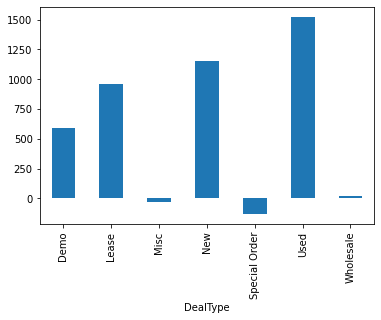

In [53]:
data_df.groupby('DealType')['GrossProfit'].mean().plot(kind='bar', label ="popularity")

In [0]:
categorical=['AccountingDate', 'BirthDate', 'DealNo', 'DealType', 'Email1Desc',
       'FIDealType', 'FiWipStatusCode']
numerical=['FIIncome', 'GrossProfit']

# The FIIncome column has a lot of negative values which makes no sense lets see how many positive values are there.

In [44]:
data_df[data_df['FIIncome']>0]

,AccountingDate,BirthDate,DealNo,DealType,Email1Desc,FIDealType,FIIncome,FiWipStatusCode,GrossProfit
1,30/10/2014,04/04/1953,87150,New,HOME,New,250.00,F,1641.55
5,09/06/2015,07/10/1967,91784,Used,NaN,Used,622.85,F,0.25
7,14/09/2015,NaN,94101,Used,NaN,Used,656.63,F,759.66
8,01/04/2013,07/10/1949,73579,Lease,HOME,New,100.00,F,469.61
11,21/04/2016,10/05/1977,98735,New,HOME,New,200.00,F,94.81
...,...,...,...,...,...,...,...,...,...
10213,30/04/2008,17/09/1956,37296,Used,NaN,Used,666.66,F,-609.67
10216,26/12/2011,09/04/1985,62452,New,HOME,New,200.00,F,1158.69
10217,08/05/2017,25/09/1962,107300,Lease,HOME,New,100.00,F,296.69
10218,31/05/2006,09/10/1985,23725,Used,NaN,Used,885.86,F,2640.45


In [0]:
data_df[data_df['FIIncome'] < 0] = 0

In [98]:
(data_df['FIIncome']>-1).sum()

10220

# Looking into the box plot we can say there are outliers in the gross profit column and the median value lies in between 0 and 2500

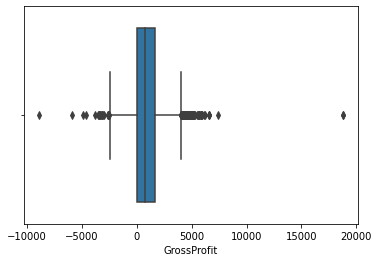

In [68]:
#outliers in GrossProfit
sns.boxplot(x='GrossProfit', data=data_df)

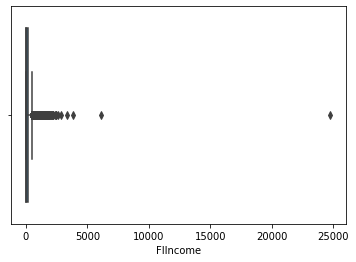

In [99]:
#outliers in FIIncome
sns.boxplot(x='FIIncome', data=data_df)

Text(336.9714285714286, 0.5, 'Gross Profit')

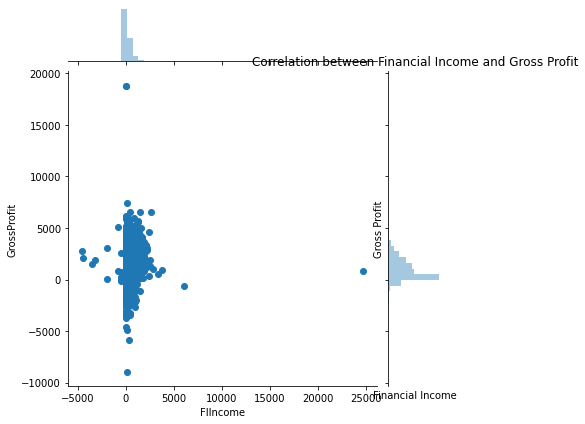

In [30]:
ax = sns.jointplot(x='FIIncome', y='GrossProfit', data=data_df[numerical])
plt.title('Correlation between Financial Income and Gross Profit')
# Set x-axis label
plt.xlabel('Financial Income')
# Set y-axis label
plt.ylabel('Gross Profit')

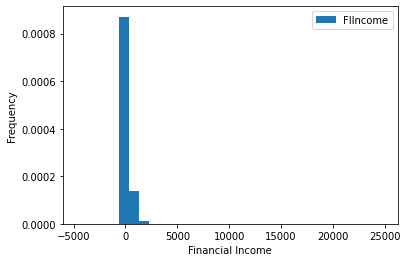

In [38]:
#PDF
data_df.plot(y='FIIncome', kind='hist',legend='True', bins=30,density=True)
plt.xlabel('Financial Income')
plt.show()

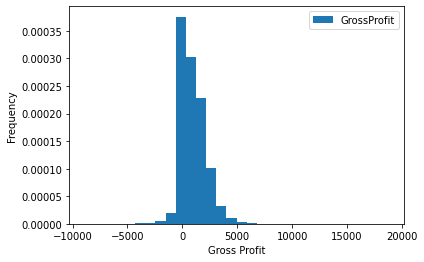

In [39]:
#PDF
data_df.plot(y='GrossProfit', kind='hist',legend='True', bins=30,density=True)
plt.xlabel('Gross Profit')
plt.show()

# The overall gross profit lies between -2500 to 5000

(-5000.0, 10000.0)

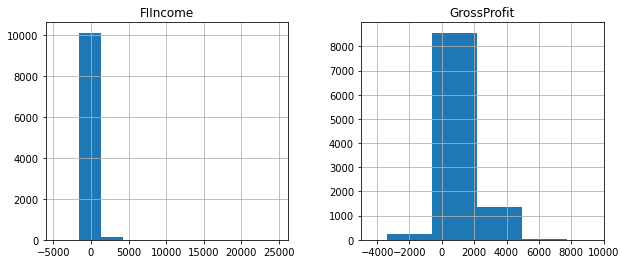

In [63]:
data_df[numerical].hist(figsize=(10, 4))
plt.xlim(-5000,10000)

(-5000.0, 10000.0)

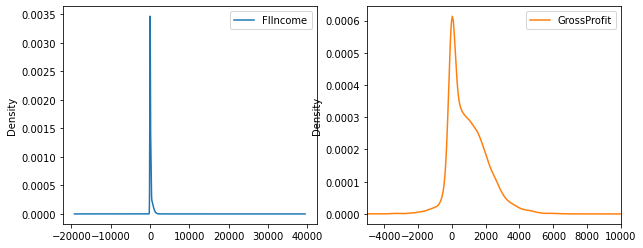

In [65]:
data_df[numerical].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4), legend=True)
plt.xlim(-5000,10000)

(-5000.0, 5000.0)

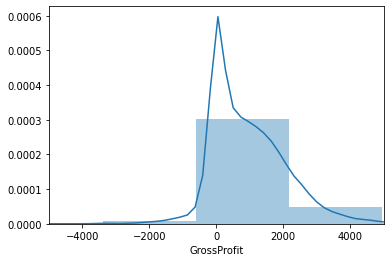

In [42]:
#zooming the plot to have a clearer view
sns.distplot(data_df['GrossProfit'],10)
plt.xlim(-5000,5000)

In [56]:
#Summarizing the numerical values in the dataset
data_df1=data_df.drop(['DealNo'],axis=1)
data_df1.describe()

,FIIncome,GrossProfit
count,10220.000000,10220.000000
mean,166.044552,947.109361
std,397.545455,1152.284860
min,-4563.020000,-8923.310000
25%,0.000000,0.000000
50%,0.000000,728.360000
75%,200.000000,1614.982500
max,24768.680000,18805.000000


#The highest profit achieved is 18805. We can say that the company is not having more Gross profits as the mean lies near to 947. 


# Categorical statistics:

In [0]:
# Counting it by its category
deals_type = data_df.groupby('DealType').size()
deals_type

DealType
Demo               16
Lease             921
Misc              569
New              4089
Special Order       3
Used             2645
Wholesale        1977
dtype: int64

Text(0, 0.5, 'Number of vehicles dealed')

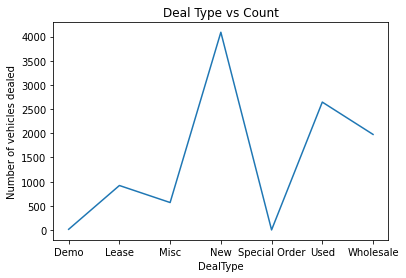

In [0]:
deals_type.plot(title = 'Deal Type vs Count')
plt.ylabel('Number of vehicles dealed')

In [75]:
data_df['FIDealType'].unique()

array(['New', 'Used', 'Misc', 'Demo', 'Special Order', 'Rental'],
      dtype=object)

In [76]:
FIdeals_type = data_df.groupby('FIDealType').size()
FIdeals_type

FIDealType
Demo               16
Misc             1569
New              5411
Rental              2
Special Order       4
Used             3218
dtype: int64

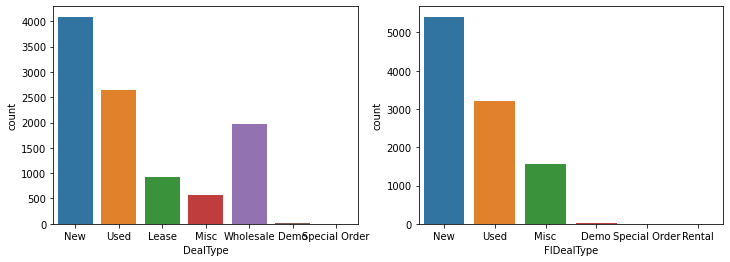

In [77]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='DealType', data=data_df, ax=axes[0]);
sns.countplot(x='FIDealType', data=data_df, ax=axes[1])

In [81]:
data_df['Email1Desc'].unique()

array([nan, 'HOME', 'WORK', 'OTHER'], dtype=object)

In [84]:
data_df['Email1Desc'].isnull().sum()
#This has a lot of null values but it wont help in prediction and so can be neglected

6172

In [0]:
#cat value can be replaced with frequently occuring value,i.e. mode
data_df['Email1Desc'].fillna(data_df['Email1Desc'].mode()[0],inplace=True)

In [95]:
data_df['Email1Desc'].isnull().sum()

0

In [82]:
data_df['BirthDate'].unique()

array(['11/03/1941', '04/04/1953', '24/04/1948', ..., '09/04/1985',
       '25/09/1962', '25/10/1965'], dtype=object)

In [78]:
# Drop duplicate 
data_df.drop_duplicates(keep ='last')
data_df.shape


(10220, 9)

In [83]:
# Drop duplicate 
data_df['AccountingDate'].drop_duplicates(keep ='last')
data_df.shape


(10220, 9)

In [0]:
# Drop columns not used ot not useful
# DOB can be used if we want to find age group buying vehicles

data_df2=data_df.drop(['Email1Desc','FIIncome', 'FiWipStatusCode'],axis=1)

# Using the lookup_df and Merging it to the existing dataset

In [161]:
lookup_df.columns


Index(['DealType', 'FIDealType', 'Sale Type'], dtype='object')

In [162]:
data_df2=data_df2.merge(lookup_df,how='left')
data_df2 = data_df2.rename({'Sale Type': 'SaleType_Clean'}, axis=1)  
data_df2

,AccountingDate,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean
0,17/03/2012,11/03/1941,64311,New,New,1314.73,New
1,30/10/2014,04/04/1953,87150,New,New,1641.55,New
2,07/06/2012,24/04/1948,66628,New,New,425.66,New
3,13/11/2009,24/05/1925,46106,New,New,4032.21,New
4,31/08/2006,12/06/1958,25584,Used,Used,-369.10,Used
...,...,...,...,...,...,...,...
10215,05/05/2014,NaN,82974,Wholesale,New,0.00,Wholesale
10216,26/12/2011,09/04/1985,62452,New,New,1158.69,New
10217,08/05/2017,25/09/1962,107300,Lease,New,296.69,New
10218,31/05/2006,09/10/1985,23725,Used,Used,2640.45,Used


In [163]:
#categorising by age by creating one more column.
today = date.today() 
today = pd.Timestamp(today)
data_df2['BirthDate'] = pd.to_datetime(data_df2['BirthDate'])
data_df2['Aging'] = (data_df2['BirthDate'].rsub(today, axis=0).dt.days)
data_df2

,AccountingDate,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean,Aging
0,17/03/2012,1941-11-03,64311,New,New,1314.73,New,28689.0
1,30/10/2014,1953-04-04,87150,New,New,1641.55,New,24519.0
2,07/06/2012,1948-04-24,66628,New,New,425.66,New,26325.0
3,13/11/2009,1925-05-24,46106,New,New,4032.21,New,34696.0
4,31/08/2006,1958-12-06,25584,Used,Used,-369.10,Used,22447.0
...,...,...,...,...,...,...,...,...
10215,05/05/2014,NaT,82974,Wholesale,New,0.00,Wholesale,NaN
10216,26/12/2011,1985-09-04,62452,New,New,1158.69,New,12678.0
10217,08/05/2017,1962-09-25,107300,Lease,New,296.69,New,21058.0
10218,31/05/2006,1985-09-10,23725,Used,Used,2640.45,Used,12672.0


In [0]:
data_df2['Aging']=data_df2['Aging'].div(365)

In [0]:

cat1= data_df2[data_df2['Aging']<25]
cat2= data_df2[(data_df2['Aging']<34) & (data_df2['Aging']>25)]
cat3= data_df2[(data_df2['Aging']<50) & (data_df2['Aging']>50)]
cat4= data_df2[data_df2['Aging']>50]


In [166]:
data_df2[(data_df2['Aging'] < 25)].sort_values('Aging', ascending = False).head(10)

,AccountingDate,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean,Aging
4506,15/05/2015,1995-06-19,91152,Used,Used,439.03,Used,24.939726
1036,31/01/2017,1995-07-09,105194,Used,Used,277.08,Used,24.884932
2734,23/08/2016,1995-08-06,101564,Used,Used,2278.28,Used,24.808219
8037,12/07/2014,1995-08-21,84556,Lease,New,149.55,New,24.767123
5449,23/07/2014,1995-08-25,84870,Lease,New,126.90,New,24.756164
2674,31/01/2014,1995-09-06,80879,Used,Used,500.00,Used,24.723288
1210,30/05/2017,1995-09-17,107843,Used,Used,736.27,Used,24.693151
3599,22/08/2016,1995-12-19,101570,Used,Used,2136.74,Used,24.438356
8242,04/06/2015,1996-02-01,91566,New,New,2130.01,New,24.317808
1135,22/12/2015,1996-02-18,96094,Lease,New,-175.76,New,24.271233


In [0]:
data_df2['AccountingDate'] = pd.to_datetime(data_df2['AccountingDate'])
t1=today- relativedelta.relativedelta(months=6)

In [196]:
data_df2.index=data_df2['AccountingDate']
data_df2['AccountingDate'].max()

Timestamp('2017-12-10 00:00:00')

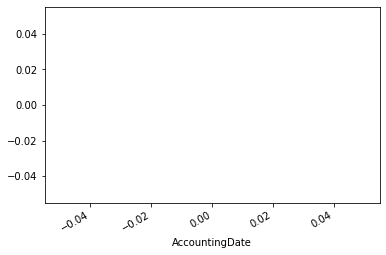

In [200]:
data_df2.loc['2017-12-10':'2017-06-10','GrossProfit'].plot()

In [0]:
data_df4=data_df2.loc['2017-12-10':'2017-06-10']
sns.countplot(x='GrossProfit', hue='SaleType_Clean', data=data_df4)

In [212]:
from sklearn.model_selection import train_test_split
X=data_df2['AccountingDate'	,'BirthDate'	,'DealNo'	,'DealType',	'FIDealType',	'GrossProfit','Aging']
y=data_df2['SaleType_Clean']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

KeyError: ignored